# Data Preprocessing & Preparation
*   Jacob Yousif


## Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%capture
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

## Process

In [6]:
file_path = 'datasets/trainingset.csv'
df_train = pd.read_csv(file_path)
file_path = 'datasets/testingset.csv'
df_test = pd.read_csv(file_path)

In [7]:
columns={
    'id': 'Id',
    'dur': 'Duration',
    'proto': 'Protocol',
    'service': 'Service',
    'state': 'State',
    'spkts': 'SourcePackets',
    'dpkts': 'DestinationPackets',
    'sbytes': 'SourceBytes',
    'dbytes': 'DestinationBytes',
    'rate': 'FlowRate',
    'sttl': 'SourceTTL',
    'dttl': 'DestinationTTL',
    'sload': 'SourceLoad',
    'dload': 'DestinationLoad',
    'sloss': 'SourceLoss',
    'dloss': 'DestinationLoss',
    'sinpkt': 'SourceInterPacketTime',
    'dinpkt': 'DestinationInterPacketTime',
    'sjit': 'SourceJitter',
    'djit': 'DestinationJitter',
    'swin': 'SourceTCPWindow',
    'stcpb': 'SourceTCPBaseSequence',
    'dtcpb': 'DestinationTCPBaseSequence',
    'dwin': 'DestinationTCPWindow',
    'tcprtt': 'TCPRTT',
    'synack': 'TCPSYNACK',
    'ackdat': 'TCPACKDelta',
    'smean': 'SourcePacketMeanSize',
    'dmean': 'DestinationPacketMeanSize',
    'trans_depth': 'TransactionDepth',
    'response_body_len': 'ResponseBodyLength',
    'ct_srv_src': 'RecordServiceSource',
    'ct_state_ttl': 'RecordStateTTL',
    'ct_dst_ltm': 'RecordDestinationLTM',
    'ct_src_dport_ltm': 'RecordSourceDPortLTM',
    'ct_dst_sport_ltm': 'RecordDestinationSPortLTM',
    'ct_dst_src_ltm': 'RecordDestinationSourceLTM',
    'is_ftp_login': 'IsFTPLogin',
    'ct_ftp_cmd': 'RecordFTPCommands',
    'ct_flw_http_mthd': 'RecordFlowHTTPMethods',
    'ct_src_ltm': 'RecordSourceLTM',
    'ct_srv_dst': 'RecordServiceDestination',
    'is_sm_ips_ports': 'IsSmallIPSPorts',
    'attack_cat': 'AttackCategory',
    'label': 'Label'
}

In [8]:
df_train = df_train.rename(columns=columns)
df_test = df_test.rename(columns=columns)

In [9]:
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

In [10]:
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

In [11]:
df_train

,Duration,Protocol,Service,State,SourcePackets,DestinationPackets,SourceBytes,DestinationBytes,FlowRate,SourceTTL,...,RecordDestinationSPortLTM,RecordDestinationSourceLTM,IsFTPLogin,RecordFTPCommands,RecordFlowHTTPMethods,RecordSourceLTM,RecordServiceDestination,IsSmallIPSPorts,AttackCategory,Label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [12]:
df_test

,Duration,Protocol,Service,State,SourcePackets,DestinationPackets,SourceBytes,DestinationBytes,FlowRate,SourceTTL,...,RecordDestinationSPortLTM,RecordDestinationSourceLTM,IsFTPLogin,RecordFTPCommands,RecordFlowHTTPMethods,RecordSourceLTM,RecordServiceDestination,IsSmallIPSPorts,AttackCategory,Label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [13]:
df_train.columns

Index(['Duration', 'Protocol', 'Service', 'State', 'SourcePackets',
       'DestinationPackets', 'SourceBytes', 'DestinationBytes', 'FlowRate',
       'SourceTTL', 'DestinationTTL', 'SourceLoad', 'DestinationLoad',
       'SourceLoss', 'DestinationLoss', 'SourceInterPacketTime',
       'DestinationInterPacketTime', 'SourceJitter', 'DestinationJitter',
       'SourceTCPWindow', 'SourceTCPBaseSequence',
       'DestinationTCPBaseSequence', 'DestinationTCPWindow', 'TCPRTT',
       'TCPSYNACK', 'TCPACKDelta', 'SourcePacketMeanSize',
       'DestinationPacketMeanSize', 'TransactionDepth', 'ResponseBodyLength',
       'RecordServiceSource', 'RecordStateTTL', 'RecordDestinationLTM',
       'RecordSourceDPortLTM', 'RecordDestinationSPortLTM',
       'RecordDestinationSourceLTM', 'IsFTPLogin', 'RecordFTPCommands',
       'RecordFlowHTTPMethods', 'RecordSourceLTM', 'RecordServiceDestination',
       'IsSmallIPSPorts', 'AttackCategory', 'Label'],
      dtype='object')

In [14]:
print(df_train.isna().sum())
print("Total NaN values in the trainset:", df_train.isna().sum().sum())

Duration                      0
Protocol                      0
Service                       0
State                         0
SourcePackets                 0
DestinationPackets            0
SourceBytes                   0
DestinationBytes              0
FlowRate                      0
SourceTTL                     0
DestinationTTL                0
SourceLoad                    0
DestinationLoad               0
SourceLoss                    0
DestinationLoss               0
SourceInterPacketTime         0
DestinationInterPacketTime    0
SourceJitter                  0
DestinationJitter             0
SourceTCPWindow               0
SourceTCPBaseSequence         0
DestinationTCPBaseSequence    0
DestinationTCPWindow          0
TCPRTT                        0
TCPSYNACK                     0
TCPACKDelta                   0
SourcePacketMeanSize          0
DestinationPacketMeanSize     0
TransactionDepth              0
ResponseBodyLength            0
RecordServiceSource           0
RecordSt

In [15]:
print(df_test.isna().sum())
print("Total NaN values in the testset:", df_test.isna().sum().sum())

Duration                      0
Protocol                      0
Service                       0
State                         0
SourcePackets                 0
DestinationPackets            0
SourceBytes                   0
DestinationBytes              0
FlowRate                      0
SourceTTL                     0
DestinationTTL                0
SourceLoad                    0
DestinationLoad               0
SourceLoss                    0
DestinationLoss               0
SourceInterPacketTime         0
DestinationInterPacketTime    0
SourceJitter                  0
DestinationJitter             0
SourceTCPWindow               0
SourceTCPBaseSequence         0
DestinationTCPBaseSequence    0
DestinationTCPWindow          0
TCPRTT                        0
TCPSYNACK                     0
TCPACKDelta                   0
SourcePacketMeanSize          0
DestinationPacketMeanSize     0
TransactionDepth              0
ResponseBodyLength            0
RecordServiceSource           0
RecordSt

In [16]:
print("The trainset size:", len(df_train))

The trainset size: 175341


In [17]:
print("The testset size:", len(df_test))

The testset size: 82332


In [18]:
file_path = 'datasets/NUSW-NB15_GT.csv'
df = pd.read_csv(file_path)

In [19]:
df.columns

Index(['Start time', 'Last time', 'Attack category', 'Attack subcategory',
       'Protocol', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Attack Name', 'Attack Reference', '.'],
      dtype='object')

In [20]:
df

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.
...,...,...,...,...,...,...,...,...,...,...,...,...
174342,1424262066,1424262069,DoS,IGMP,tcp,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,.
174343,1424262067,1424262068,Fuzzers,SMB,tcp,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,.
174344,1424262067,1424262068,Reconnaissance,SunRPC Portmapper (TCP) UDP Service,tcp,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,NaN,.
174345,1424262068,1424262068,Generic,IXIA,udp,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.


In [21]:
file_path = 'datasets/UNSW-NB15_LIST_EVENTS.csv'
df_events = pd.read_csv(file_path)

In [22]:
df_events.columns

Index(['Attack category', 'Attack subcategory', 'Number of events'], dtype='object')

In [23]:
df_events

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245
...,...,...,...
203,Shellcode,Decoders,18
204,Shellcode,Multiple OS,10
205,Shellcode,Solaris,12
206,Worms,,174


In [24]:
string_columns = df_train.select_dtypes(include='object').columns
print("Columns with string data types:", string_columns)

Columns with string data types: Index(['Protocol', 'Service', 'State', 'AttackCategory'], dtype='object')


In [25]:
mapping_dicts = {}

In [26]:
for col in string_columns:
    unique_values = df_train[col].unique().tolist()
    mapping_dicts[col] = {val: idx for idx, val in enumerate(unique_values)}
    print(f"{col} Mapping Dictionary: {mapping_dicts[col]}\n\n")

Protocol Mapping Dictionary: {'tcp': 0, 'udp': 1, 'arp': 2, 'ospf': 3, 'icmp': 4, 'igmp': 5, 'rtp': 6, 'ddp': 7, 'ipv6-frag': 8, 'cftp': 9, 'wsn': 10, 'pvp': 11, 'wb-expak': 12, 'mtp': 13, 'pri-enc': 14, 'sat-mon': 15, 'cphb': 16, 'sun-nd': 17, 'iso-ip': 18, 'xtp': 19, 'il': 20, 'unas': 21, 'mfe-nsp': 22, '3pc': 23, 'ipv6-route': 24, 'idrp': 25, 'bna': 26, 'swipe': 27, 'kryptolan': 28, 'cpnx': 29, 'rsvp': 30, 'wb-mon': 31, 'vmtp': 32, 'ib': 33, 'dgp': 34, 'eigrp': 35, 'ax.25': 36, 'gmtp': 37, 'pnni': 38, 'sep': 39, 'pgm': 40, 'idpr-cmtp': 41, 'zero': 42, 'rvd': 43, 'mobile': 44, 'narp': 45, 'fc': 46, 'pipe': 47, 'ipcomp': 48, 'ipv6-no': 49, 'sat-expak': 50, 'ipv6-opts': 51, 'snp': 52, 'ipcv': 53, 'br-sat-mon': 54, 'ttp': 55, 'tcf': 56, 'nsfnet-igp': 57, 'sprite-rpc': 58, 'aes-sp3-d': 59, 'sccopmce': 60, 'sctp': 61, 'qnx': 62, 'scps': 63, 'etherip': 64, 'aris': 65, 'pim': 66, 'compaq-peer': 67, 'vrrp': 68, 'iatp': 69, 'stp': 70, 'l2tp': 71, 'srp': 72, 'sm': 73, 'isis': 74, 'smp': 75, 'f

In [27]:
mappings_dir = 'datasets/meta'

In [28]:
for col, mapping in mapping_dicts.items():
    filename = f"{col}_mapping.json"
    filepath = os.path.join(mappings_dir, filename)
    with open(filepath, 'w') as json_file:
        json.dump(mapping, json_file, indent=4)
    print(f"Mapping for column '{col}' has been saved to '{filepath}'.")

Mapping for column 'Protocol' has been saved to 'datasets/meta\Protocol_mapping.json'.
Mapping for column 'Service' has been saved to 'datasets/meta\Service_mapping.json'.
Mapping for column 'State' has been saved to 'datasets/meta\State_mapping.json'.
Mapping for column 'AttackCategory' has been saved to 'datasets/meta\AttackCategory_mapping.json'.


In [29]:
for col in string_columns:
    new_col_name = col + "Code"
    df_train[new_col_name] = df_train[col].map(mapping_dicts[col]).astype(int)
    df_test[col] = df_test[col].apply(lambda x: x if x in mapping_dicts[col] else 'N/A')
    if 'N/A' not in mapping_dicts[col]:
        mapping_dicts[col]['N/A'] = -1
    df_test[new_col_name] = df_test[col].map(mapping_dicts[col]).fillna(-1).astype(int)

In [30]:
df_train

,Duration,Protocol,Service,State,SourcePackets,DestinationPackets,SourceBytes,DestinationBytes,FlowRate,SourceTTL,...,RecordFlowHTTPMethods,RecordSourceLTM,RecordServiceDestination,IsSmallIPSPorts,AttackCategory,Label,ProtocolCode,ServiceCode,StateCode,AttackCategoryCode
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,0,1,1,0,Normal,0,0,0,0,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,0,1,6,0,Normal,0,0,0,0,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,0,2,6,0,Normal,0,0,0,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,0,2,1,0,Normal,0,0,1,0,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,0,2,39,0,Normal,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,0,24,24,0,Generic,1,1,6,1,9
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,0,1,1,0,Shellcode,1,0,0,0,4
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,0,3,12,0,Generic,1,1,6,1,9
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,0,30,30,0,Generic,1,1,6,1,9


In [31]:
df_test

,Duration,Protocol,Service,State,SourcePackets,DestinationPackets,SourceBytes,DestinationBytes,FlowRate,SourceTTL,...,RecordFlowHTTPMethods,RecordSourceLTM,RecordServiceDestination,IsSmallIPSPorts,AttackCategory,Label,ProtocolCode,ServiceCode,StateCode,AttackCategoryCode
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,0,1,2,0,Normal,0,1,0,1,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,0,1,2,0,Normal,0,1,0,1,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,0,1,3,0,Normal,0,1,0,1,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,0,2,3,0,Normal,0,1,0,1,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,0,2,3,0,Normal,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,0,2,1,0,Normal,0,1,0,1,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,0,3,2,0,Normal,0,0,0,0,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,0,1,1,1,Normal,0,2,0,1,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,0,1,1,1,Normal,0,2,0,1,0


In [32]:
df_test.columns

Index(['Duration', 'Protocol', 'Service', 'State', 'SourcePackets',
       'DestinationPackets', 'SourceBytes', 'DestinationBytes', 'FlowRate',
       'SourceTTL', 'DestinationTTL', 'SourceLoad', 'DestinationLoad',
       'SourceLoss', 'DestinationLoss', 'SourceInterPacketTime',
       'DestinationInterPacketTime', 'SourceJitter', 'DestinationJitter',
       'SourceTCPWindow', 'SourceTCPBaseSequence',
       'DestinationTCPBaseSequence', 'DestinationTCPWindow', 'TCPRTT',
       'TCPSYNACK', 'TCPACKDelta', 'SourcePacketMeanSize',
       'DestinationPacketMeanSize', 'TransactionDepth', 'ResponseBodyLength',
       'RecordServiceSource', 'RecordStateTTL', 'RecordDestinationLTM',
       'RecordSourceDPortLTM', 'RecordDestinationSPortLTM',
       'RecordDestinationSourceLTM', 'IsFTPLogin', 'RecordFTPCommands',
       'RecordFlowHTTPMethods', 'RecordSourceLTM', 'RecordServiceDestination',
       'IsSmallIPSPorts', 'AttackCategory', 'Label', 'ProtocolCode',
       'ServiceCode', 'StateCode', 

In [33]:
train_length = len(df_train)
test_length = len(df_test)

In [34]:
total_length = train_length + test_length
test_percentage = (test_length / total_length) * 100

In [35]:
print(f"Number of rows in Training Set: {train_length}")
print(f"Number of rows in Testing Set: {test_length}")
print(f"Total number of rows: {total_length}")
print(f"Percentage of test rows from total: {test_percentage:.1f}%")

Number of rows in Training Set: 175341
Number of rows in Testing Set: 82332
Total number of rows: 257673
Percentage of test rows from total: 32.0%


In [36]:
csv_file_path = 'datasets/TrainSet.csv'
df_train.to_csv(csv_file_path, index=False)

In [37]:
csv_file_path = 'datasets/TestSet.csv'
df_test.to_csv(csv_file_path, index=False)

In [38]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df = df.drop_duplicates()
df = df.reset_index(drop=False, inplace=False)

In [39]:
df.drop(columns=['index'], inplace=True)

In [40]:
df.drop(columns=['Label'], inplace=True)

In [41]:
print(df.isna().sum())
print("Total NaN values in the dataset:", df.isna().sum().sum())

Duration                      0
Protocol                      0
Service                       0
State                         0
SourcePackets                 0
DestinationPackets            0
SourceBytes                   0
DestinationBytes              0
FlowRate                      0
SourceTTL                     0
DestinationTTL                0
SourceLoad                    0
DestinationLoad               0
SourceLoss                    0
DestinationLoss               0
SourceInterPacketTime         0
DestinationInterPacketTime    0
SourceJitter                  0
DestinationJitter             0
SourceTCPWindow               0
SourceTCPBaseSequence         0
DestinationTCPBaseSequence    0
DestinationTCPWindow          0
TCPRTT                        0
TCPSYNACK                     0
TCPACKDelta                   0
SourcePacketMeanSize          0
DestinationPacketMeanSize     0
TransactionDepth              0
ResponseBodyLength            0
RecordServiceSource           0
RecordSt

In [42]:
df

,Duration,Protocol,Service,State,SourcePackets,DestinationPackets,SourceBytes,DestinationBytes,FlowRate,SourceTTL,...,RecordFTPCommands,RecordFlowHTTPMethods,RecordSourceLTM,RecordServiceDestination,IsSmallIPSPorts,AttackCategory,ProtocolCode,ServiceCode,StateCode,AttackCategoryCode
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,0,0,1,1,0,Normal,0,0,0,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,0,0,1,6,0,Normal,0,0,0,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,0,0,2,6,0,Normal,0,0,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,0,2,1,0,Normal,0,1,0,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,0,0,2,39,0,Normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162740,0.947039,tcp,-,FIN,10,6,588,268,15.838841,254,...,0,0,1,4,0,Normal,0,0,0,0
162741,0.811914,tcp,-,FIN,10,6,588,268,18.474862,254,...,0,0,1,4,0,Normal,0,0,0,0
162742,5.167410,tcp,-,FIN,108,24,138067,1042,25.351192,254,...,0,0,1,3,0,Normal,0,0,0,0
162743,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,0,0,2,1,0,Normal,1,0,1,0


In [43]:
df.describe()

,Duration,SourcePackets,DestinationPackets,SourceBytes,DestinationBytes,FlowRate,SourceTTL,DestinationTTL,SourceLoad,DestinationLoad,...,IsFTPLogin,RecordFTPCommands,RecordFlowHTTPMethods,RecordSourceLTM,RecordServiceDestination,IsSmallIPSPorts,ProtocolCode,ServiceCode,StateCode,AttackCategoryCode
count,162745.000000,162745.000000,162745.000000,1.627450e+05,1.627450e+05,1.627450e+05,162745.000000,162745.00000,1.627450e+05,1.627450e+05,...,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000
mean,1.252714,28.609475,28.511579,1.291327e+04,2.229745e+04,3.880025e+04,146.598611,125.76245,4.864382e+07,1.038744e+06,...,0.014698,0.014729,0.173922,3.896998,5.045476,0.003988,3.147826,1.669888,0.472279,2.442262
std,5.093951,168.900118,137.871311,2.169121e+05,1.807485e+05,1.159475e+05,107.455744,116.70385,2.059415e+08,2.968526e+06,...,0.122115,0.122388,0.572048,4.953769,6.451811,0.063023,14.584327,2.392784,0.808507,2.916809
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.001723,4.000000,2.000000,5.100000e+02,1.780000e+02,2.557576e+01,31.000000,29.00000,9.029087e+03,1.919402e+03,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.328957,10.000000,8.000000,9.220000e+02,3.540000e+02,8.185405e+01,62.000000,29.00000,6.873062e+04,6.931899e+03,...,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.956087,20.000000,18.000000,2.456000e+03,2.478000e+03,4.002287e+03,254.000000,252.00000,1.129970e+06,4.121056e+05,...,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,1.000000,4.000000,1.000000,6.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.00000,5.988000e+09,2.242273e+07,...,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,132.000000,12.000000,8.000000,9.000000


In [44]:
csv_file_path = 'datasets/CompleteSet.csv'
df.to_csv(csv_file_path, index=False)

In [45]:
features = [
    'Duration', 'ProtocolCode', 'ServiceCode', 'StateCode', 'SourcePackets',
    'DestinationPackets', 'SourceBytes', 'DestinationBytes', 'FlowRate',
    'SourceTTL', 'DestinationTTL', 'SourceLoad', 'DestinationLoad',
    'SourceLoss', 'DestinationLoss', 'SourceInterPacketTime',
    'DestinationInterPacketTime', 'SourceJitter', 'DestinationJitter',
    'SourceTCPWindow', 'SourceTCPBaseSequence',
    'DestinationTCPBaseSequence', 'DestinationTCPWindow', 'TCPRTT',
    'TCPSYNACK', 'TCPACKDelta', 'SourcePacketMeanSize',
    'DestinationPacketMeanSize', 'TransactionDepth', 'ResponseBodyLength',
    'RecordServiceSource', 'RecordStateTTL', 'RecordDestinationLTM',
    'RecordSourceDPortLTM', 'RecordDestinationSPortLTM',
    'RecordDestinationSourceLTM', 'IsFTPLogin', 'RecordFTPCommands',
    'RecordFlowHTTPMethods', 'RecordSourceLTM', 'RecordServiceDestination',
    'IsSmallIPSPorts'
]

In [46]:
X = df[features]
y = df['AttackCategoryCode']

In [47]:
category_distribution = df.groupby('AttackCategory').size().reset_index(name='Record')

In [48]:
category_distribution = category_distribution.sort_values(by='Record', ascending=True).reset_index(drop=True)

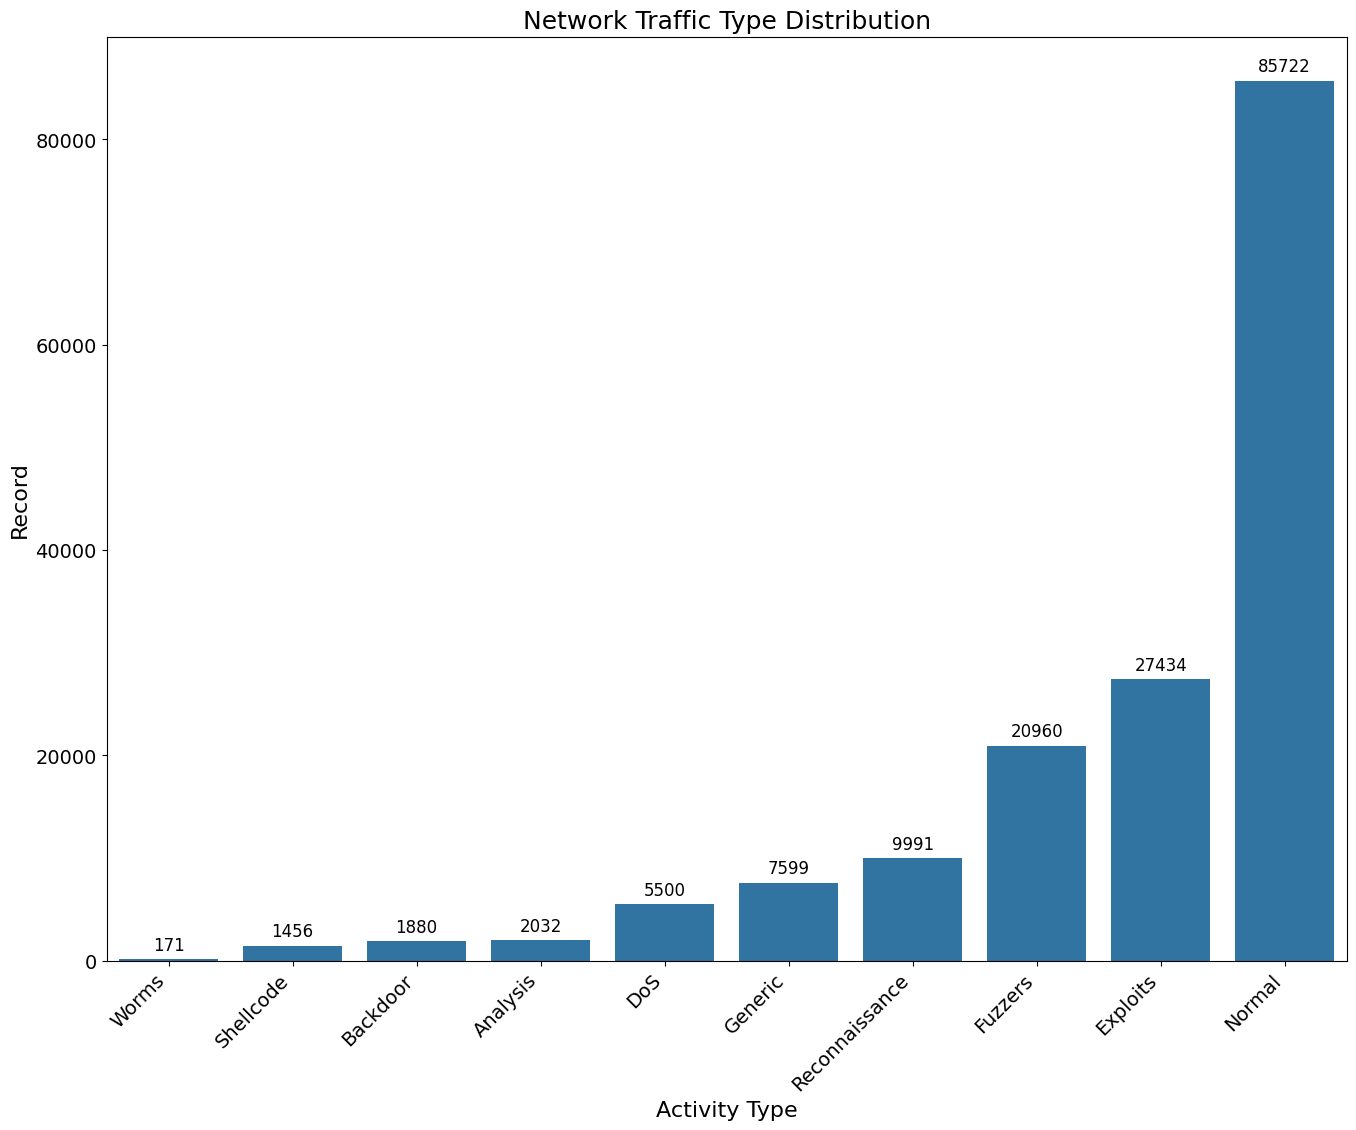

In [49]:
plt.figure(figsize=(16, 12))
ax = sns.barplot(x='AttackCategory', y='Record', data=category_distribution, 
                 order=category_distribution['AttackCategory'])


plt.title('Network Traffic Type Distribution', fontsize=18)
plt.xlabel('Activity Type', fontsize=16)
plt.ylabel('Record', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center',  
                va='center',  
                xytext=(0, 10),  
                textcoords='offset points',
                fontsize=12)
plt.savefig('figures/data/DistributionAttackCategory.pdf', bbox_inches='tight')
plt.show()

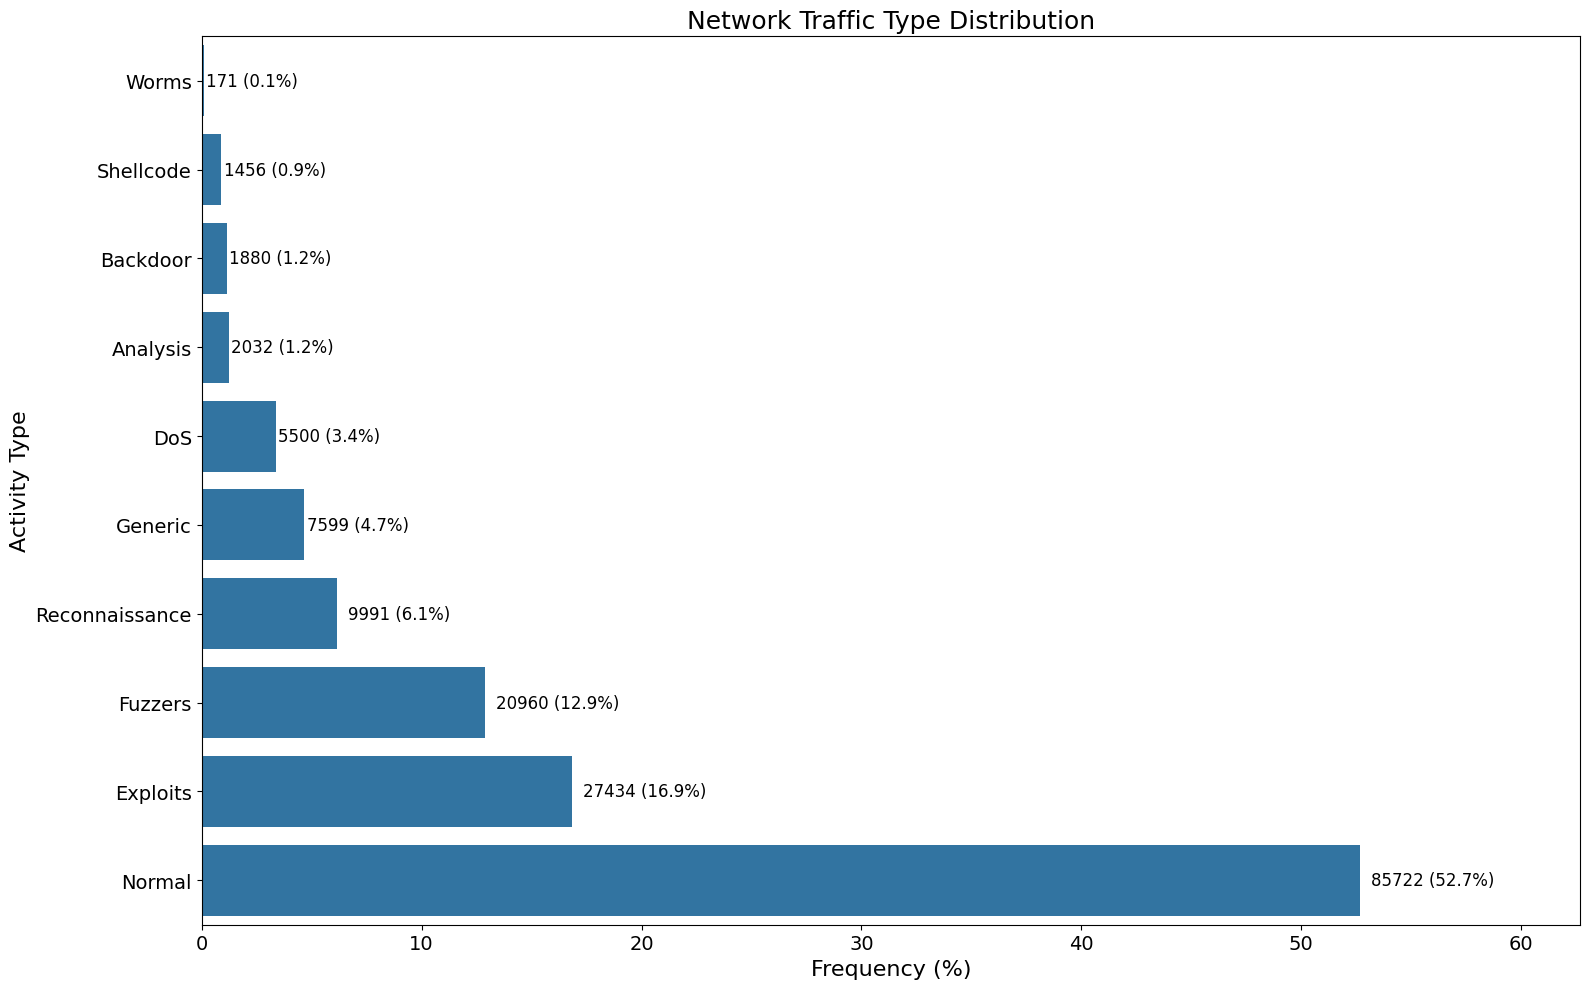

In [50]:
total = category_distribution['Record'].sum()
category_distribution['Percentage'] = (category_distribution['Record'] / total) * 100
category_distribution = category_distribution.sort_values(by='Percentage', ascending=True).reset_index(drop=True)
plt.figure(figsize=(16, 10))
ax = sns.barplot(x='Percentage', y='AttackCategory', data=category_distribution)
plt.title('Network Traffic Type Distribution', fontsize=18)
plt.xlabel('Frequency (%)', fontsize=16)
plt.ylabel('Activity Type', fontsize=16)
for index, row in category_distribution.iterrows():

    Record = row['Record']
    percentage = row['Percentage']
    annotation = f'{Record} ({percentage:.1f}%)'

    if percentage < 5:  #
        plt.text(
            percentage + 0.1, 
            index,  
            annotation,  
            color='black',  
            ha='left',  
            va='center',  
            fontsize=12,  
            bbox=dict(facecolor='white', edgecolor='none', pad=1.5)  
        )
    else:  
        plt.text(
            percentage + 0.5,  
            index,  
            annotation,  
            color='black',  
            ha='left',  
            va='center',  
            fontsize=12
        )

plt.xlim(0, category_distribution['Percentage'].max() + 10)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('figures/data/ProportionAttackCategory.pdf', bbox_inches='tight')
plt.show()

In [51]:
_counts = df['AttackCategory'].value_counts()
average_count = int(_counts.mean())
deviations = _counts - average_count

In [52]:
class_counts = df['AttackCategory'].value_counts()
num_classes = class_counts.size
mean = class_counts.sum() / num_classes

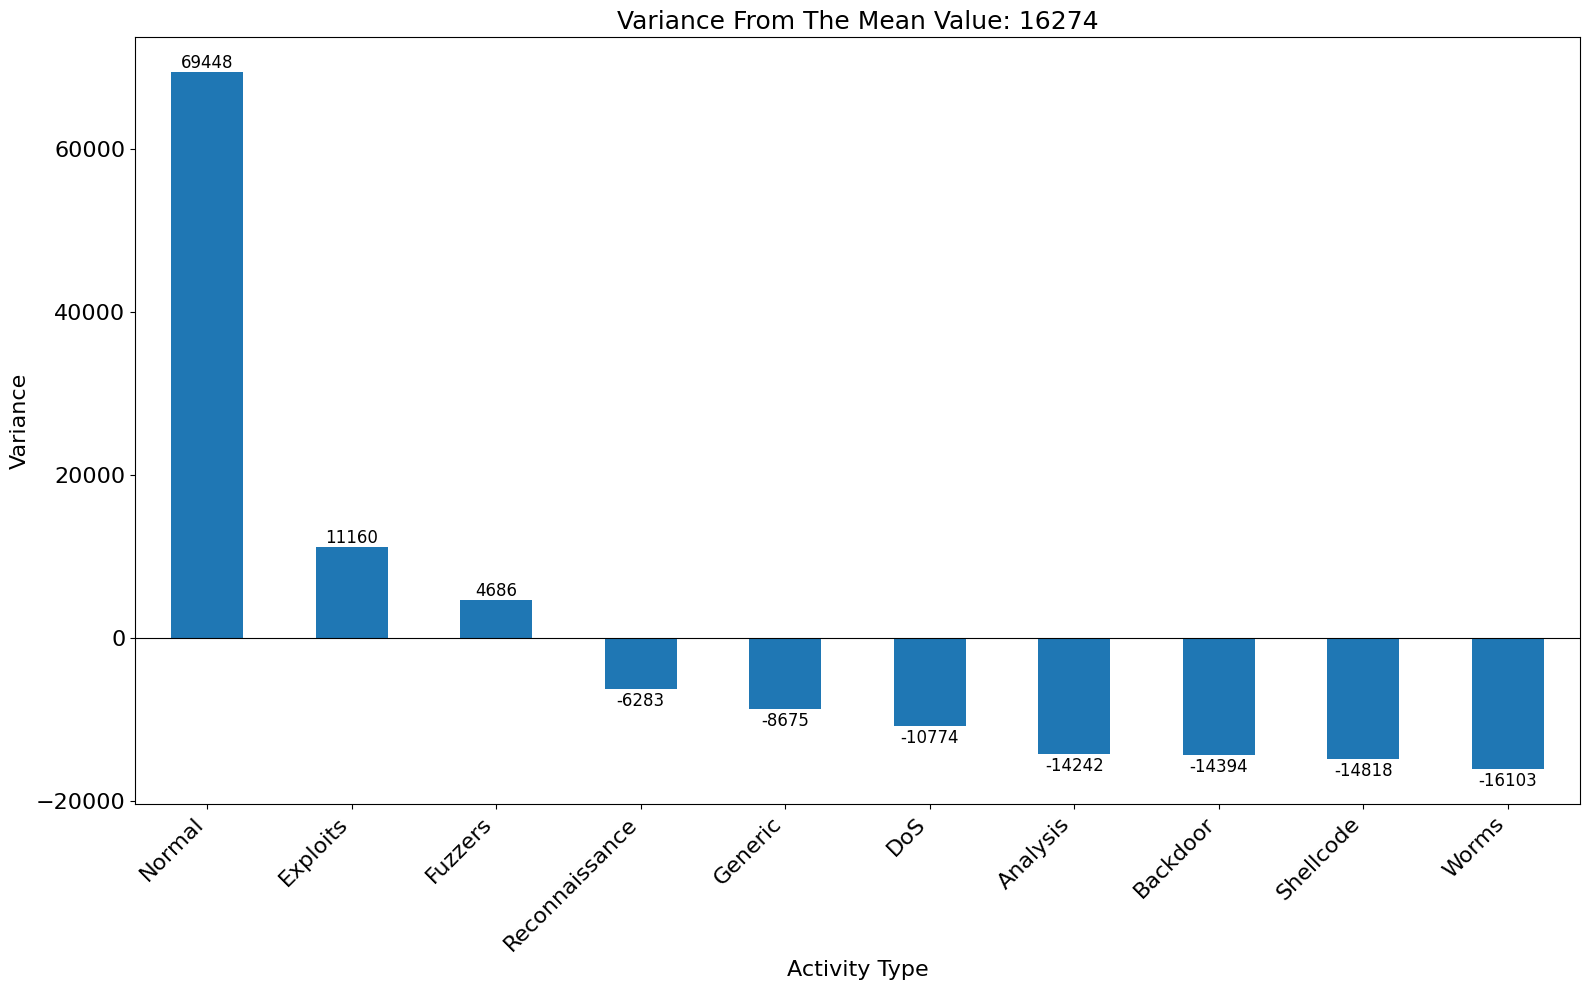

In [53]:
fig, ax = plt.subplots(figsize=(16, 10))

deviations.plot(kind='bar', ax=ax)


plt.title(f'Variance From The Mean Value: {int(mean)}', fontsize=18)
plt.xlabel('Activity Type', fontsize=16)
plt.ylabel('Variance', fontsize=16)


plt.axhline(0, color='black', linewidth=0.8)


for i, v in enumerate(deviations):
    ax.text(i, v + (480 if v > 0 else -2100), str(v), ha='center', fontsize=12)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


plt.tight_layout()
plt.savefig('figures/data/DeviationFromAverage.pdf', bbox_inches='tight')
plt.show()

In [54]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [55]:
np.savez('datasets/hypertuning_train_set/LearningSet.npz', 
         X_train=X_train.values, y_train=y_train.values, 
         X_val=X_val.values, y_val=y_val.values, 
         X_test=X_test.values, y_test=y_test.values,
        feature_names=np.array(features))

In [56]:
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Set: {X_val.shape}, Labels: {y_val.shape}")
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")

Training Set: (113921, 42), Labels: (113921,)
Validation Set: (24412, 42), Labels: (24412,)
Testing Set: (24412, 42), Labels: (24412,)
